In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, names=column_names)
print("Number of samples: %d" % len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
print("First five rows")
print(df.head())
print("*********")
print("columns",df.columns)
print("*********")
print("shape:",df.shape)
print("*********")
print("Size:",df.size)
print("*********")
print(df.describe())
print("*********")
print(df.nunique())

First five rows
  sex  length  diameter  ...  viscera weight  shell weight  rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]
*********
columns Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')
*********
shape: (4177, 9)
*********
Size: 37593
*********
            length     diameter  ...  shell weight        rings
count  4177.000000  4177.000000  ...   4177.000000  4177.000000
mean      0.523992     0.407881  ...      0.238831     9.933684
std       0.120093     0.099240  ...      0.139203     3.224169
min       0.075000     0.055000  ...      0.001500     1.000000
25%       0.4500

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


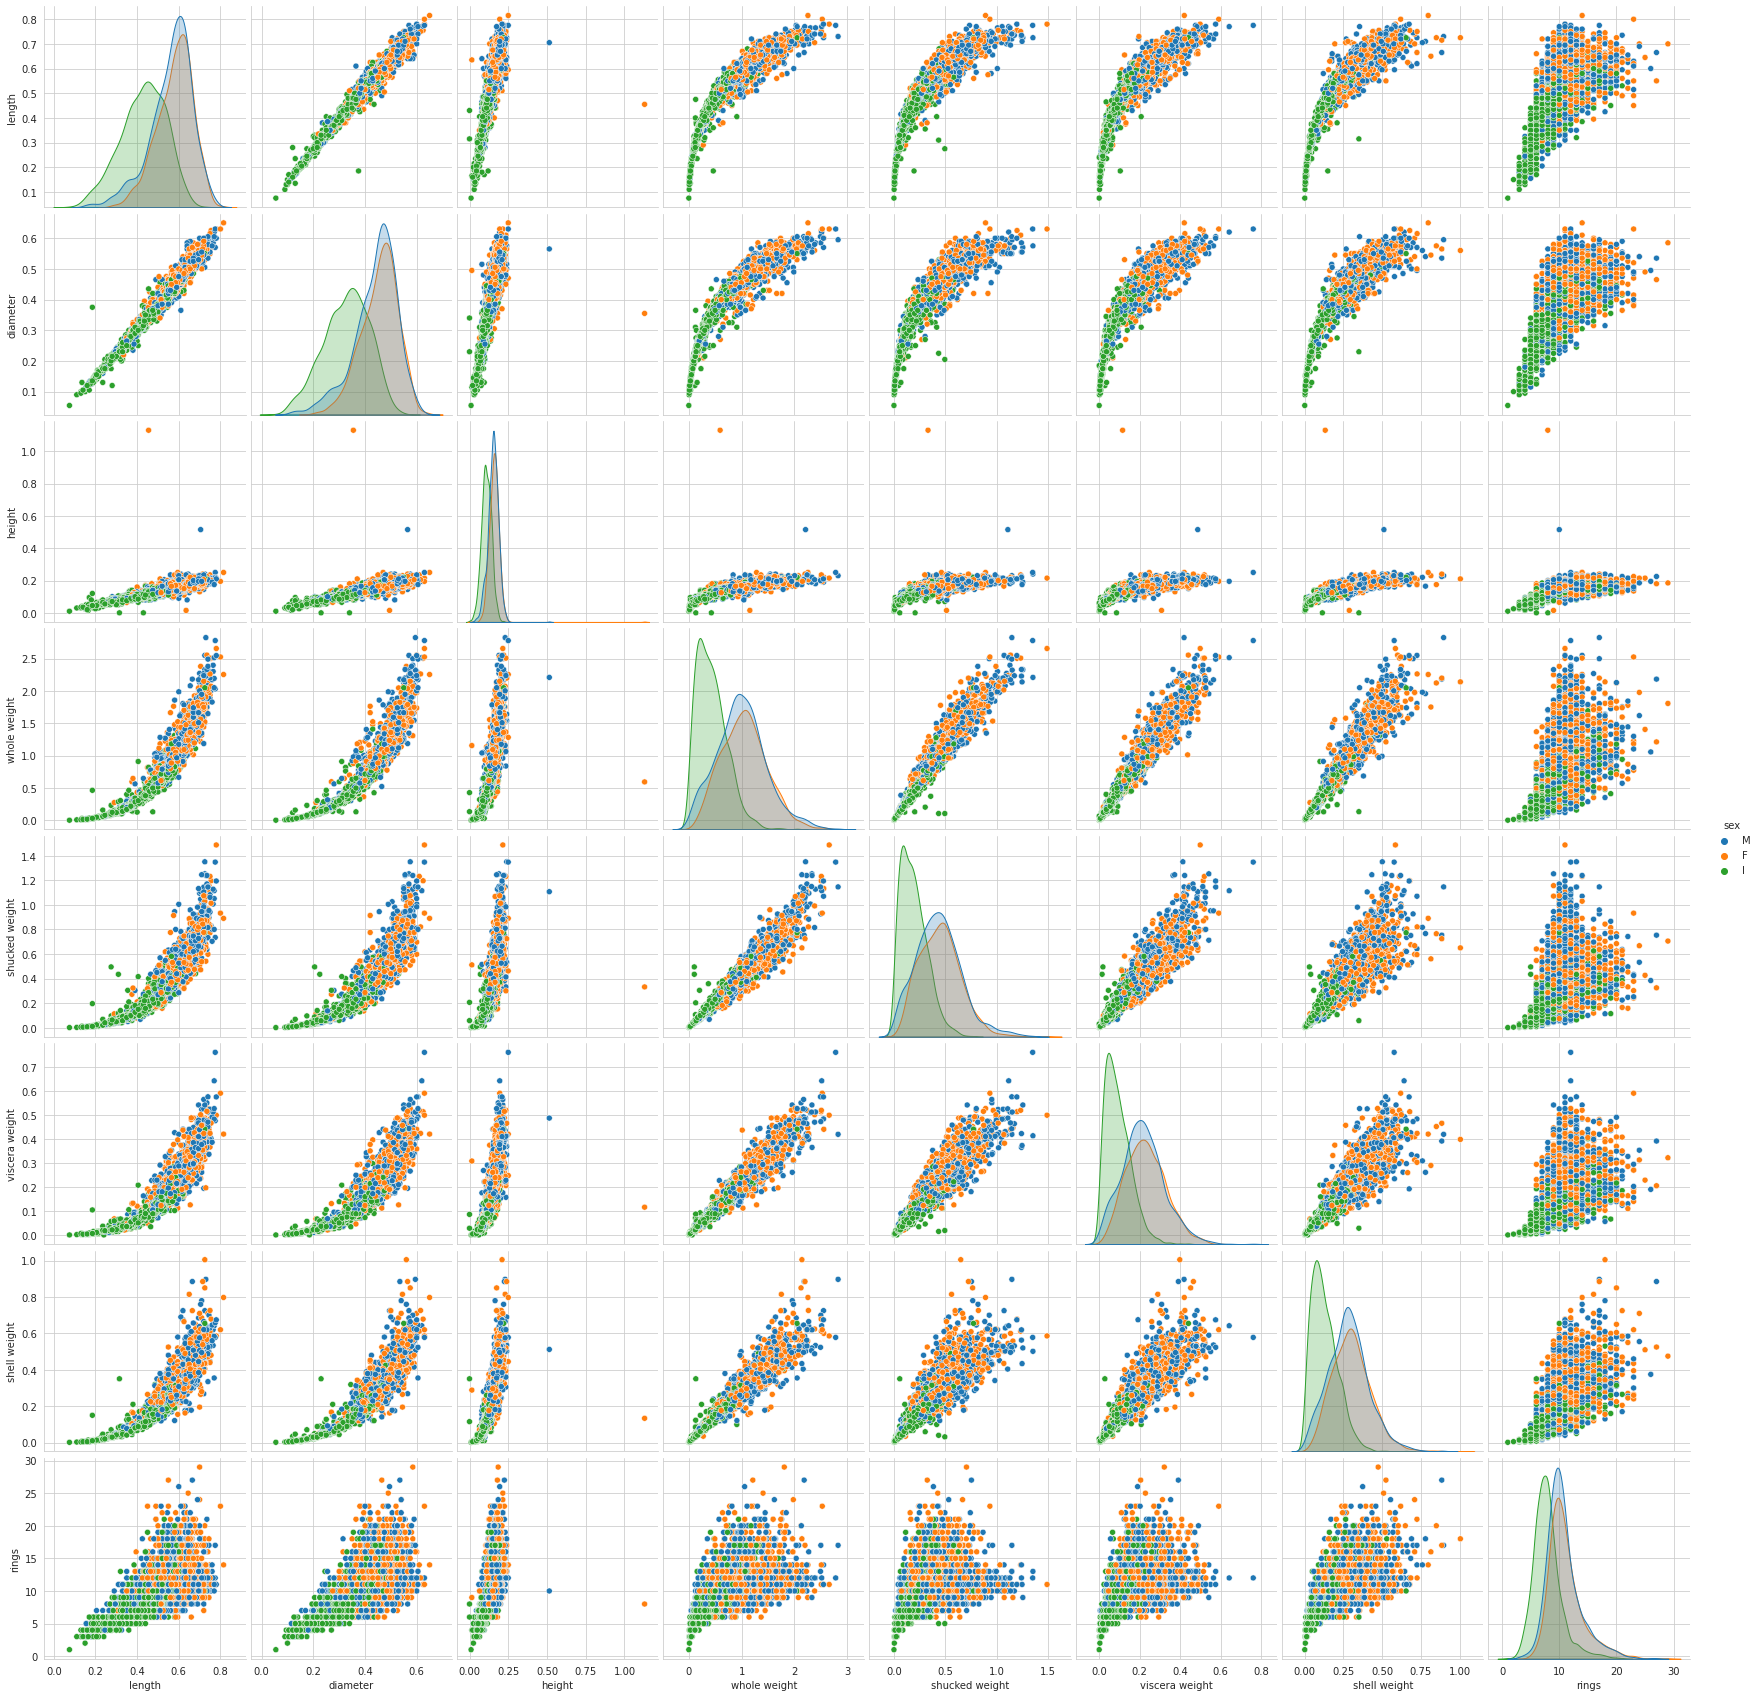

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue = 'sex' ,size=3);
plt.show()

**Classification**

In [ ]:
X = df[['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings']] #predictors


y = df['sex'] #target

In [ ]:
#the test set will be 30% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Showing the breakdown of the distribution of classes
print("Class Counts")
print(y_test.value_counts(), end="\n\n")
print("Class Proportions")
print(y_test.value_counts()/len(y_test))

Class Counts
M    458
I    419
F    377
Name: sex, dtype: int64

Class Proportions
M    0.365231
I    0.334131
F    0.300638
Name: sex, dtype: float64


In [ ]:
#Build the Logistic regression object
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
#use logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generate predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generate predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)

In [ ]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
dummy = DummyClassifier(strategy= 'most_frequent')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [ ]:
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Logistic Regression) = 0.5685805422647527

Test accuracy (Dummy Classifier) = 0.3652312599681021


![alt text](https://miro.medium.com/proxy/1*7EYylA6XlXSGBCF77j_rOA.png)

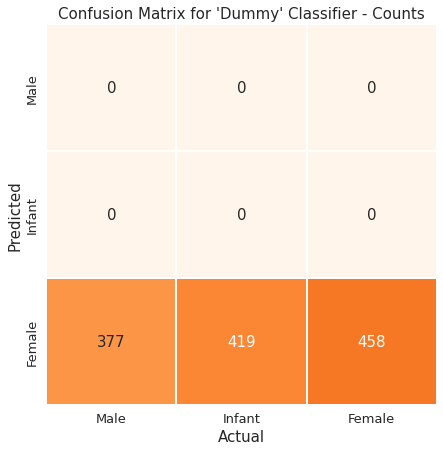

In [ ]:
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

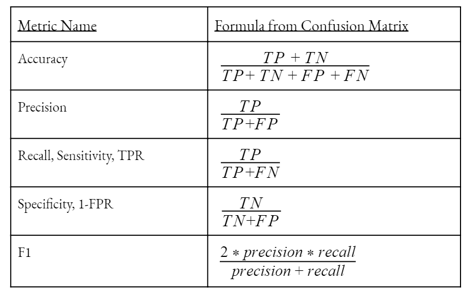

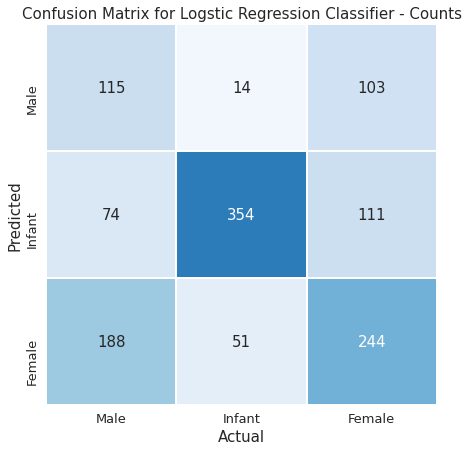

In [ ]:
#generate confusion matrix
cm_logis = confusion_matrix(y_test, logis_pred)
#put it into a dataframe
cm_logis_df = pd.DataFrame(cm_logis)

fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot=True, annot_kws={"size": 15}, cmap="Blues", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for Logstic Regression Classifier - Counts", fontsize=15)

plt.show()

In [ ]:
y_predict = logisticRegr.predict(X_test)
print("Accuracy LR: {:.2f}".format(logisticRegr.score(X_test, y_test)))

Accuracy LR: 0.57


In [ ]:
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['predict'])

In [ ]:
dftest = pd.concat([y_test, y_predict])
df3 = dftest.head(25)
df3.head()

,0,predict
866,M,NaN
1483,M,NaN
599,F,NaN
1702,F,NaN
670,M,NaN


**Clustering**

Text(0, 0.5, 'heigth')

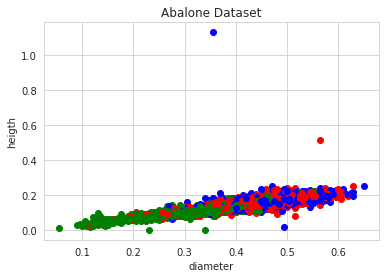

In [ ]:
colors = {'M':'r', 'I':'g', 'F':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(df['diameter'])):
    ax.scatter(df['diameter'][i], df['height'][i],color=colors[df['sex'][i]])
# set a title and labels
ax.set_title('Abalone Dataset')
ax.set_xlabel('diameter')
ax.set_ylabel('heigth')

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
NN = X_train
NN['predict'] = kmeans.fit_predict(NN)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


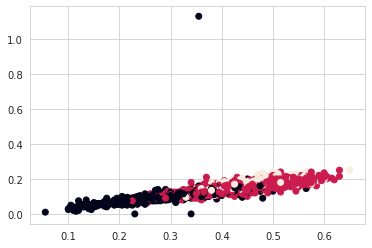

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(NN['diameter'], NN['height'],c=NN['predict'])

## **My comments:**

The purpose of this workbook is to predict the sex of abalone by its length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, and rings. The author used two methods - classification and the clustering method, to compare the prediction results. By comparing these two methods we have discussed in class, the audience can get a better understanding of the differences. As usual, the author did some data cleanings and took a look at the data set by using describe, shape, and pair plot functions.

For the classification, the author split the data set into 30% testing and 70% training. Next, the logistic regression object was built and fit the training data. Next, he built the dummy classifier that predicts every observation to be the most frequent class. Lastly, confusion matrixes were generated for both dummy classifier and logistic regression classifier. The result shows that the accuracy for the classification prediction is 0.57, which is not very accurate.

For the clustering, the author assigned three different colors to the sex attribute. First, a scatter plot was graphed to see the relationship between sex, diameter, and height. This plot can also be the baseline to compare how good the prediction is. Next, the author used K Means classifier and assigned 3” as the desired grouping numbers for the outcome. Lastly, another scatter plot was made. Although there are several data points that were grouped to the wrong type, this clustering method did the job pretty well.
